In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14



In [2]:
import numpy as np
import pandas as pd
import glob

In [3]:
from gi import histoplot, scatter_xy, scatter_xyze
from gi import event_size, event_edep, event_mult, event_class, fiducial_df, twocluster_df, add_distances

## Read gamma interaction file

In [4]:
rootdir = "/Users/jjgomezcadenas/Data/G4Prods/crystalGI/Test"
filenm = "gamma_interactions_test_1.csv"

In [5]:
df = pd.read_csv(f"{rootdir}/{filenm}", header=0).sort_values(by='event')

In [6]:
df.head(10)

,event,trkid,trkmass,motherid,x,y,z,trkl,edep,proc
14,0,2,511.0,1,20.2,-6.4,-4.9,370.6,297.7,compt
3,0,3,511.0,1,16.7,-6.7,-6.5,201.8,207.6,phot
22,1,2,511.0,1,-10.1,-19.9,-11.1,0.5,4.7,compt
23,2,2,511.0,1,8.6,-21.6,16.6,92.5,128.9,compt
36,3,4,511.0,1,6.9,-12.3,11.0,232.2,225.7,phot
45,3,3,511.0,1,2.1,-20.4,14.7,142.8,182.7,compt
50,3,2,511.0,1,1.9,-20.9,13.8,33.1,69.4,compt
71,4,2,511.0,1,9.2,-4.1,8.7,391.8,332.2,compt
60,4,3,511.0,1,8.3,-5.8,5.3,126.3,142.8,phot
81,5,5,511.0,1,10.7,18.8,15.5,33.3,69.5,compt


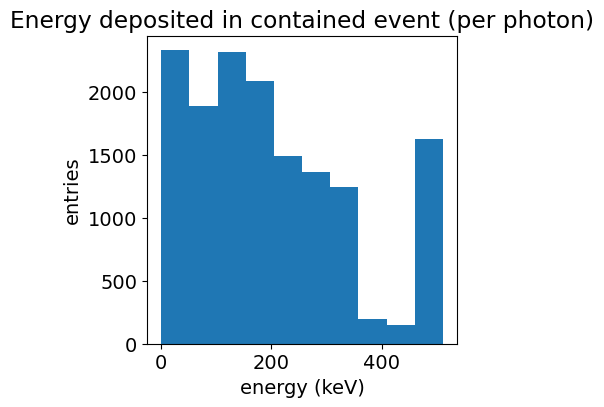

In [7]:
b, e = histoplot(df.edep, 'energy (keV)', "entries", bins=10, figsize=(6,6),
                title="Energy deposited in contained event (per photon)")

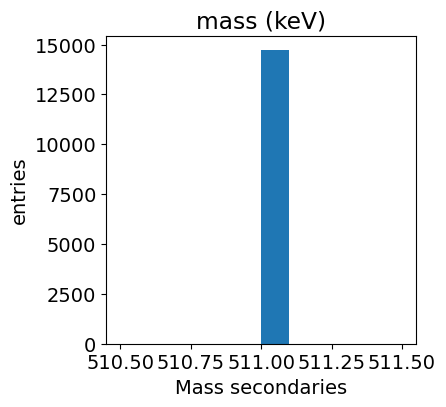

In [8]:
b, e = histoplot(df.trkmass, 'Mass secondaries', "entries", bins=10, figsize=(6,6),
                title="mass (keV)")

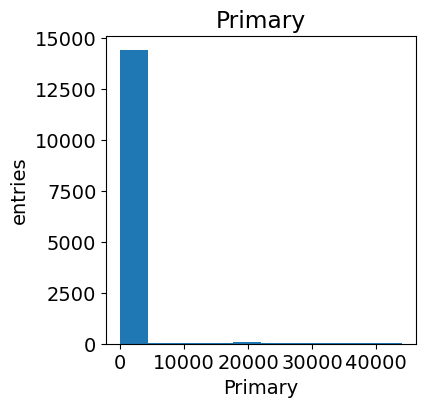

In [9]:
b, e = histoplot(df.motherid, 'Primary', "entries", bins=10, figsize=(6,6),
                title="Primary")

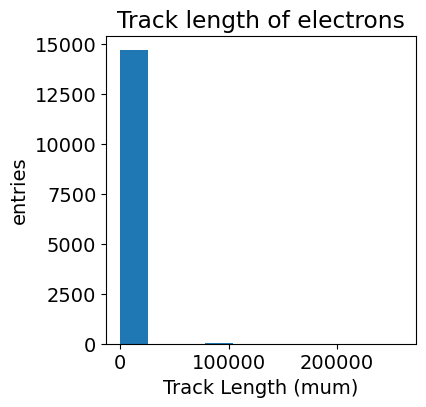

In [10]:
b, e = histoplot(df.trkl, 'Track Length (mum)', "entries", bins=10, figsize=(6,6),
                title="Track length of electrons")

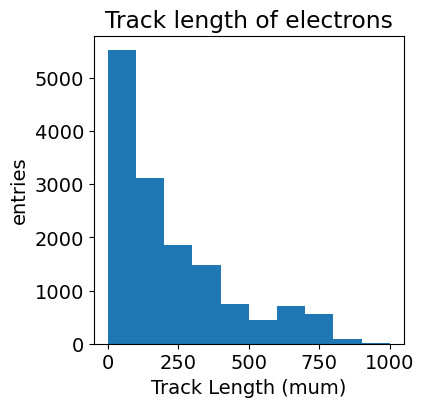

In [11]:
b, e = histoplot(df.trkl[df.trkl<1000], 'Track Length (mum)', "entries", bins=10, figsize=(6,6),
                title="Track length of electrons")

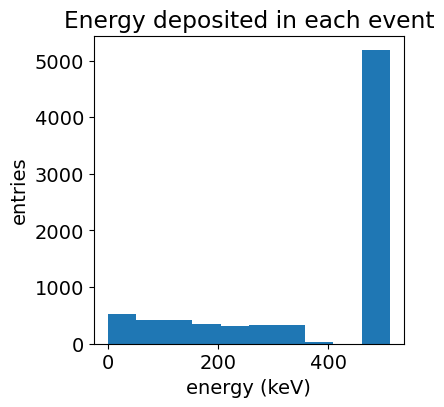

In [12]:
b, e = histoplot(event_edep(df), 'energy (keV)', "entries", bins=10, figsize=(6,6),
                title="Energy deposited in each event")

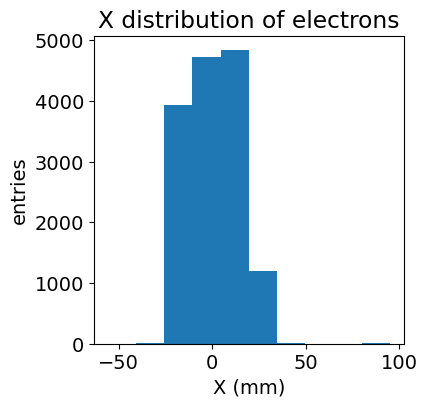

In [13]:
b, e = histoplot(df.x, 'X (mm)', "entries", bins=10, figsize=(6,6),
                title="X distribution of electrons")

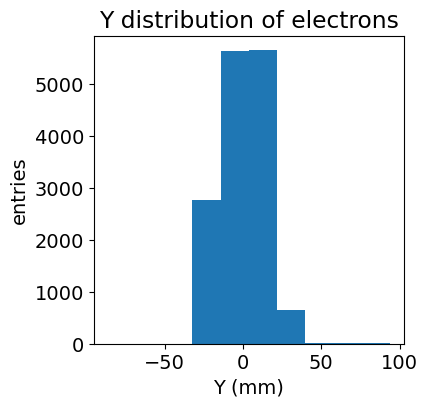

In [14]:
b, e = histoplot(df.y, 'Y (mm)', "entries", bins=10, figsize=(6,6),
                title="Y distribution of electrons")

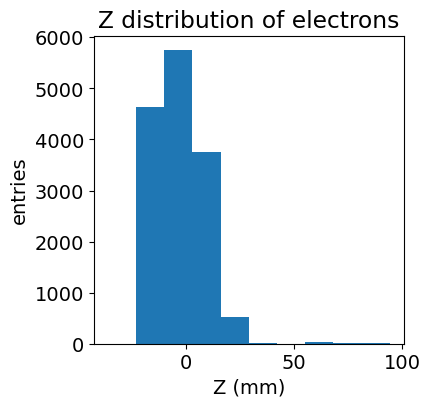

In [15]:
b, e = histoplot(df.z, 'Z (mm)', "entries", bins=10, figsize=(6,6),
                title="Z distribution of electrons")

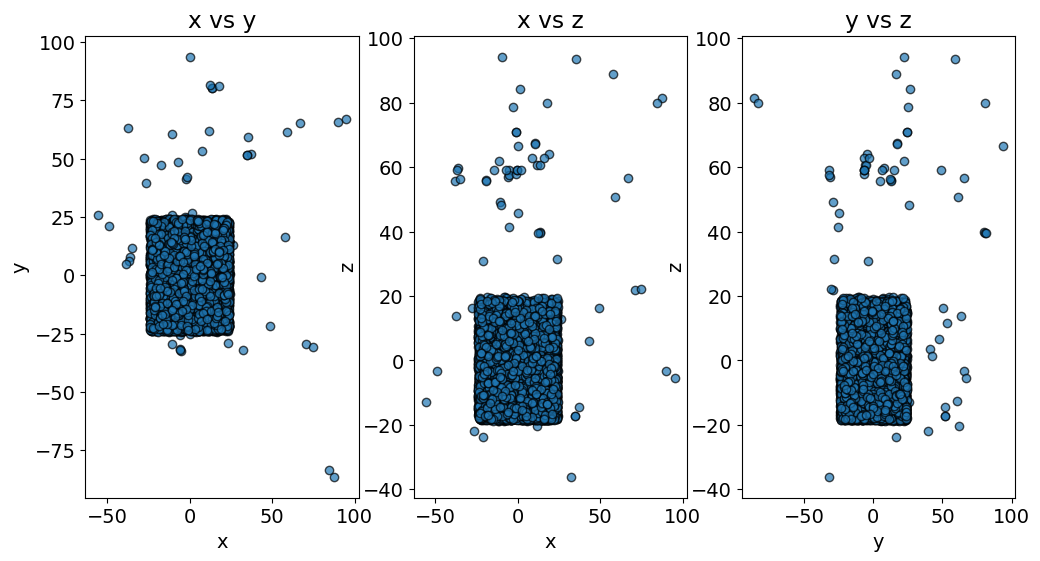

In [16]:
scatter_xy(df, figsize=(12, 6))

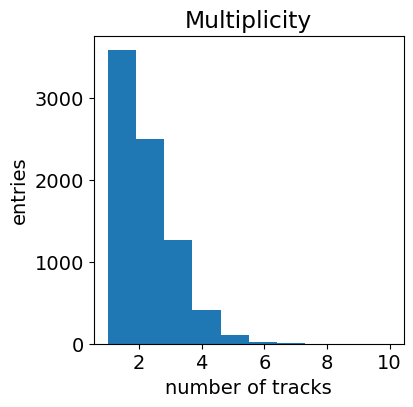

In [17]:
b, e = histoplot(event_mult(df), 'number of tracks', "entries", bins=10, figsize=(6,6),
                title="Multiplicity")

### what are the electrons that do not come from initial gamma?

In [18]:
dfx = df[df.motherid>1]

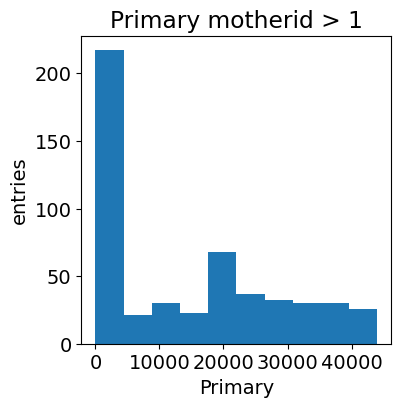

In [19]:
b, e = histoplot(dfx.motherid, 'Primary', "entries", bins=10, figsize=(6,6),
                title="Primary motherid > 1")

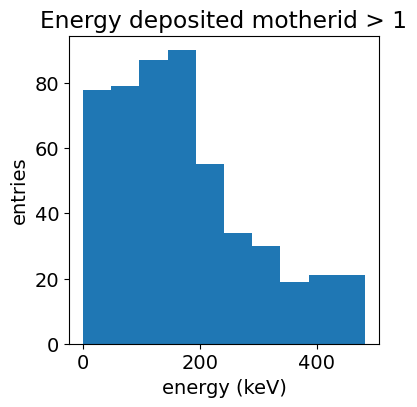

In [20]:
b, e = histoplot(dfx.edep, 'energy (keV)', "entries", bins=10, figsize=(6,6),
                title="Energy deposited motherid > 1")

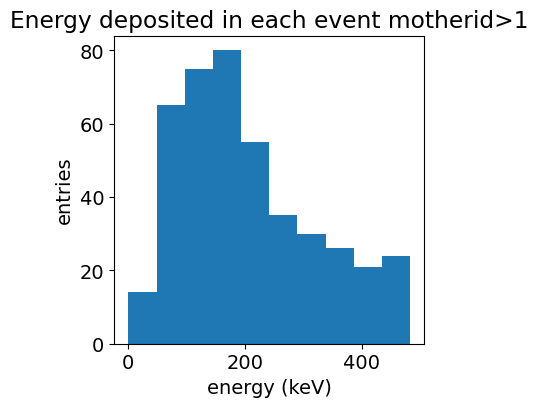

In [21]:
b, e = histoplot(event_edep(dfx), 'energy (keV)', "entries", bins=10, figsize=(6,6),
                title="Energy deposited in each event motherid>1")

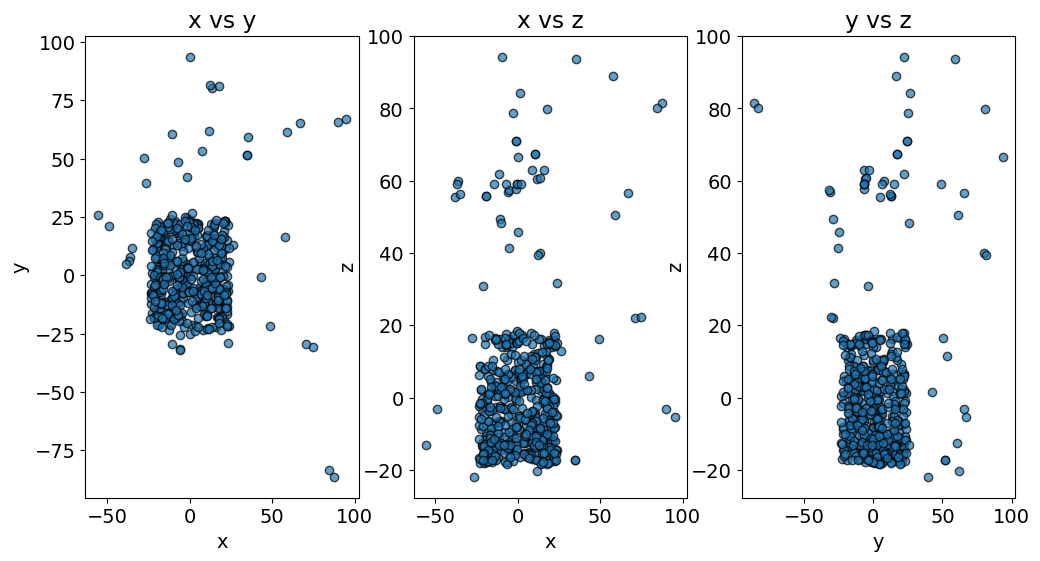

In [22]:
scatter_xy(dfx, figsize=(12, 6))

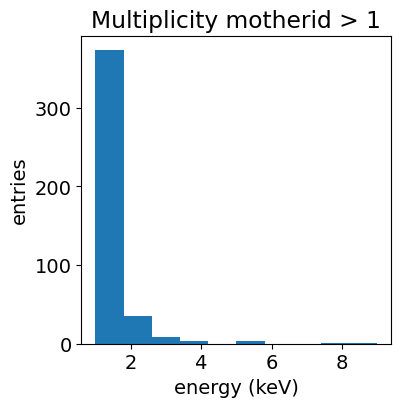

In [23]:
b, e = histoplot(event_mult(dfx), 'energy (keV)', "entries", bins=10, figsize=(6,6),
                title="Multiplicity motherid > 1")

### Define a fiducial dataframe
- cut events where motherid not 1
- Impose to be inside crystal dimensions
- Tracklength less than 1 mm.
- add total energy and number of particles in the event
- remove mass and motherid (its alwasy e-,  and 1)

In [24]:
dfx = fiducial_df(df, trkl=1000, d=48.2, z=37.2)

In [25]:
dfx.head(10)

,event,trkid,x,y,z,edep,proc,etot,ntrk
0,0,2,20.2,-6.4,-4.9,297.7,compt,505.3,2
1,0,3,16.7,-6.7,-6.5,207.6,phot,505.3,2
2,1,2,-10.1,-19.9,-11.1,4.7,compt,4.7,1
3,2,2,8.6,-21.6,16.6,128.9,compt,128.9,1
4,3,4,6.9,-12.3,11.0,225.7,phot,477.8,3
5,3,3,2.1,-20.4,14.7,182.7,compt,477.8,3
6,3,2,1.9,-20.9,13.8,69.4,compt,477.8,3
7,4,2,9.2,-4.1,8.7,332.2,compt,475.0,2
8,4,3,8.3,-5.8,5.3,142.8,phot,475.0,2
9,5,5,10.7,18.8,15.5,69.5,compt,475.1,5


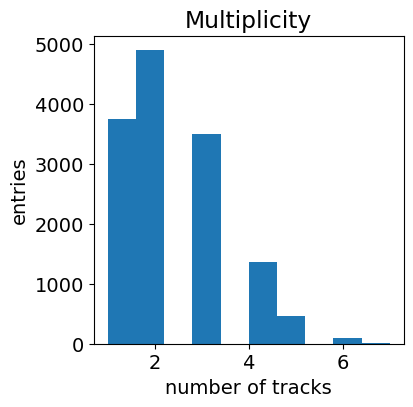

In [26]:
b, e = histoplot(dfx.ntrk, 'number of tracks', "entries", bins=10, figsize=(6,6),
                title="Multiplicity")

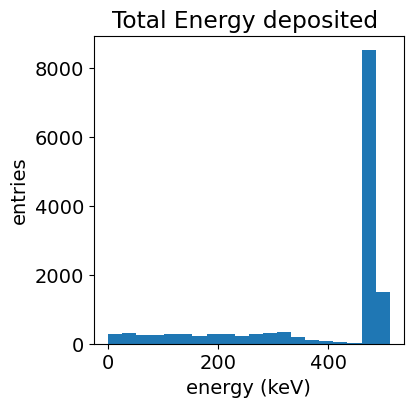

In [27]:
b, e = histoplot(dfx.etot, 'energy (keV)', "entries", bins=20, figsize=(6,6),
                title="Total Energy deposited ")

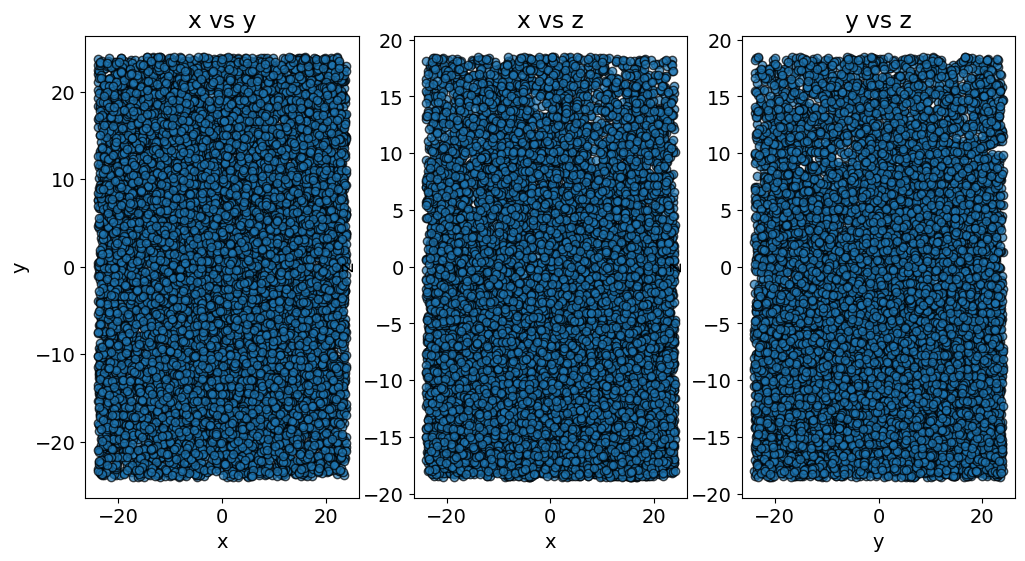

In [28]:
scatter_xy(dfx, figsize=(12, 6))

In [29]:
event_size(dfx)/event_size(df)

0.9935238095238095

### Cut in energy
- Only events with energy near the photopeak are relevant

In [30]:
dfe = dfx[dfx.etot>450]

In [31]:
dfe.head(10)

,event,trkid,x,y,z,edep,proc,etot,ntrk
0,0,2,20.2,-6.4,-4.9,297.7,compt,505.3,2
1,0,3,16.7,-6.7,-6.5,207.6,phot,505.3,2
4,3,4,6.9,-12.3,11.0,225.7,phot,477.8,3
5,3,3,2.1,-20.4,14.7,182.7,compt,477.8,3
6,3,2,1.9,-20.9,13.8,69.4,compt,477.8,3
7,4,2,9.2,-4.1,8.7,332.2,compt,475.0,2
8,4,3,8.3,-5.8,5.3,142.8,phot,475.0,2
9,5,5,10.7,18.8,15.5,69.5,compt,475.1,5
10,5,4,10.7,17.4,18.3,205.4,compt,475.1,5
11,5,2,0.6,11.5,6.3,14.3,compt,475.1,5


In [32]:
event_size(dfe)/event_size(df)

0.6091428571428571

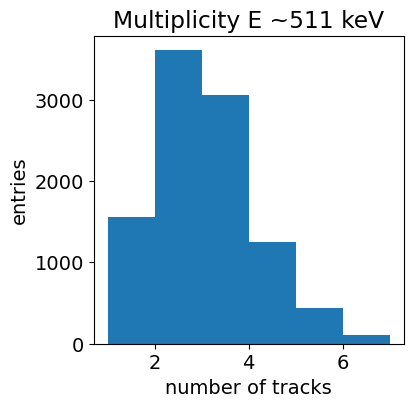

In [33]:
b, e = histoplot(dfe.ntrk, 'number of tracks', "entries", bins=6, figsize=(6,6),
                title="Multiplicity E ~511 keV")

### Create a two-cluster df

In [34]:
df2c = twocluster_df(dfe)

In [35]:
df2c.head(10)

,index,event,etot,ntrk,proc,x1,y1,z1,e1,x2,y2,z2,e2,x12,y12,z12,xb,yb,zb
0,0,0,505.3,2,compt,20.2,-6.4,-4.9,297.7,16.7,-6.7,-6.5,207.6,18.762042,-6.523254,-5.557352,18.762042,-6.523254,-5.557352
1,1,3,477.8,3,phot,6.9,-12.3,11.0,225.7,2.1,-20.4,14.7,182.7,4.752693,-15.923580,12.655215,4.338342,-16.646400,12.821494
2,2,4,475.0,2,compt,9.2,-4.1,8.7,332.2,8.3,-5.8,5.3,142.8,8.929432,-4.611074,7.677853,8.929432,-4.611074,7.677853
3,3,5,475.1,5,compt,10.7,17.4,18.3,205.4,1.5,11.6,9.9,94.3,7.805239,15.575042,15.656957,8.704904,16.758009,15.611303
4,4,6,477.8,1,phot,7.4,1.2,-14.8,477.8,7.4,1.2,-14.8,477.8,7.400000,1.200000,-14.800000,7.400000,1.200000,-14.800000
5,5,8,477.8,1,phot,-17.6,-23.5,-16.3,477.8,-17.6,-23.5,-16.3,477.8,-17.600000,-23.500000,-16.300000,-17.600000,-23.500000,-16.300000
6,6,9,475.0,2,compt,21.4,19.2,11.1,338.7,20.1,19.2,6.3,136.3,21.026968,19.200000,9.722653,21.026968,19.200000,9.722653
7,7,11,509.9,1,phot,-14.8,-3.0,-8.7,509.9,-14.8,-3.0,-8.7,509.9,-14.800000,-3.000000,-8.700000,-14.800000,-3.000000,-8.700000
8,8,14,475.0,4,phot,-3.3,8.8,10.8,170.5,-6.6,11.8,8.5,149.7,-4.842817,10.202561,9.724703,-5.217326,9.967874,7.605537
9,9,15,477.8,3,compt,6.9,14.1,-5.2,215.2,12.3,13.6,-3.7,143.4,9.059398,13.900056,-4.600167,9.169318,14.523734,-4.051277


In [36]:
dfpe = df2c[df2c.ntrk==1]
dfco = df2c[df2c.ntrk>1]
print(f"Fraction of photoelectric events  = {event_size(dfpe)/event_size(df2c)}, of compton = {event_size(dfco)/event_size(df2c)}")
print(f"wrt total phe  = {event_size(dfpe)/event_size(df)}, compton = {event_size(dfco)/event_size(df)}")

Fraction of photoelectric events  = 0.3243693975401292, of compton = 0.6756306024598707
wrt total phe  = 0.1975873015873016, compton = 0.41155555555555556


In [37]:
add_distances(df2c)

In [38]:
df2c.head(10)

,index,event,etot,ntrk,proc,x1,y1,z1,e1,x2,...,z2,e2,x12,y12,z12,xb,yb,zb,d12,d12b
0,0,0,505.3,2,compt,20.2,-6.4,-4.9,297.7,16.7,...,-6.5,207.6,18.762042,-6.523254,-5.557352,18.762042,-6.523254,-5.557352,3.860052,0.000000e+00
1,1,3,477.8,3,phot,6.9,-12.3,11.0,225.7,2.1,...,14.7,182.7,4.752693,-15.923580,12.655215,4.338342,-16.646400,12.821494,10.116323,8.495909e-01
2,2,4,475.0,2,compt,9.2,-4.1,8.7,332.2,8.3,...,5.3,142.8,8.929432,-4.611074,7.677853,8.929432,-4.611074,7.677853,3.906405,0.000000e+00
3,3,5,475.1,5,compt,10.7,17.4,18.3,205.4,1.5,...,9.9,94.3,7.805239,15.575042,15.656957,8.704904,16.758009,15.611303,13.741907,1.486907e+00
4,4,6,477.8,1,phot,7.4,1.2,-14.8,477.8,7.4,...,-14.8,477.8,7.400000,1.200000,-14.800000,7.400000,1.200000,-14.800000,0.000000,0.000000e+00
5,5,8,477.8,1,phot,-17.6,-23.5,-16.3,477.8,-17.6,...,-16.3,477.8,-17.600000,-23.500000,-16.300000,-17.600000,-23.500000,-16.300000,0.000000,0.000000e+00
6,6,9,475.0,2,compt,21.4,19.2,11.1,338.7,20.1,...,6.3,136.3,21.026968,19.200000,9.722653,21.026968,19.200000,9.722653,4.972927,0.000000e+00
7,7,11,509.9,1,phot,-14.8,-3.0,-8.7,509.9,-14.8,...,-8.7,509.9,-14.800000,-3.000000,-8.700000,-14.800000,-3.000000,-8.700000,0.000000,4.440892e-16
8,8,14,475.0,4,phot,-3.3,8.8,10.8,170.5,-6.6,...,8.5,149.7,-4.842817,10.202561,9.724703,-5.217326,9.967874,7.605537,5.017968,2.164764e+00
9,9,15,477.8,3,compt,6.9,14.1,-5.2,215.2,12.3,...,-3.7,143.4,9.059398,13.900056,-4.600167,9.169318,14.523734,-4.051277,5.626722,8.380558e-01


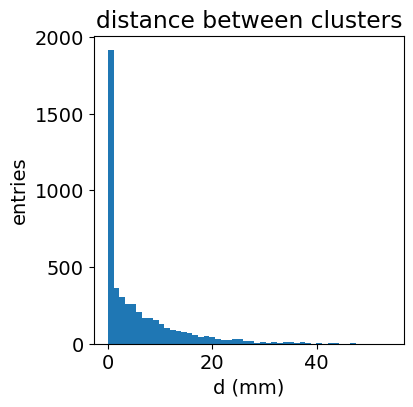

In [39]:
b, e = histoplot(df2c.d12, 'd (mm)', "entries", bins=50, figsize=(6,6),
                title="distance between clusters")

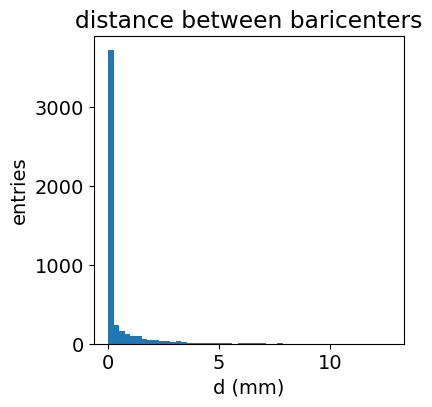

In [40]:
b, e = histoplot(df2c.d12b, 'd (mm)', "entries", bins=50, figsize=(6,6),
                title="distance between baricenters")

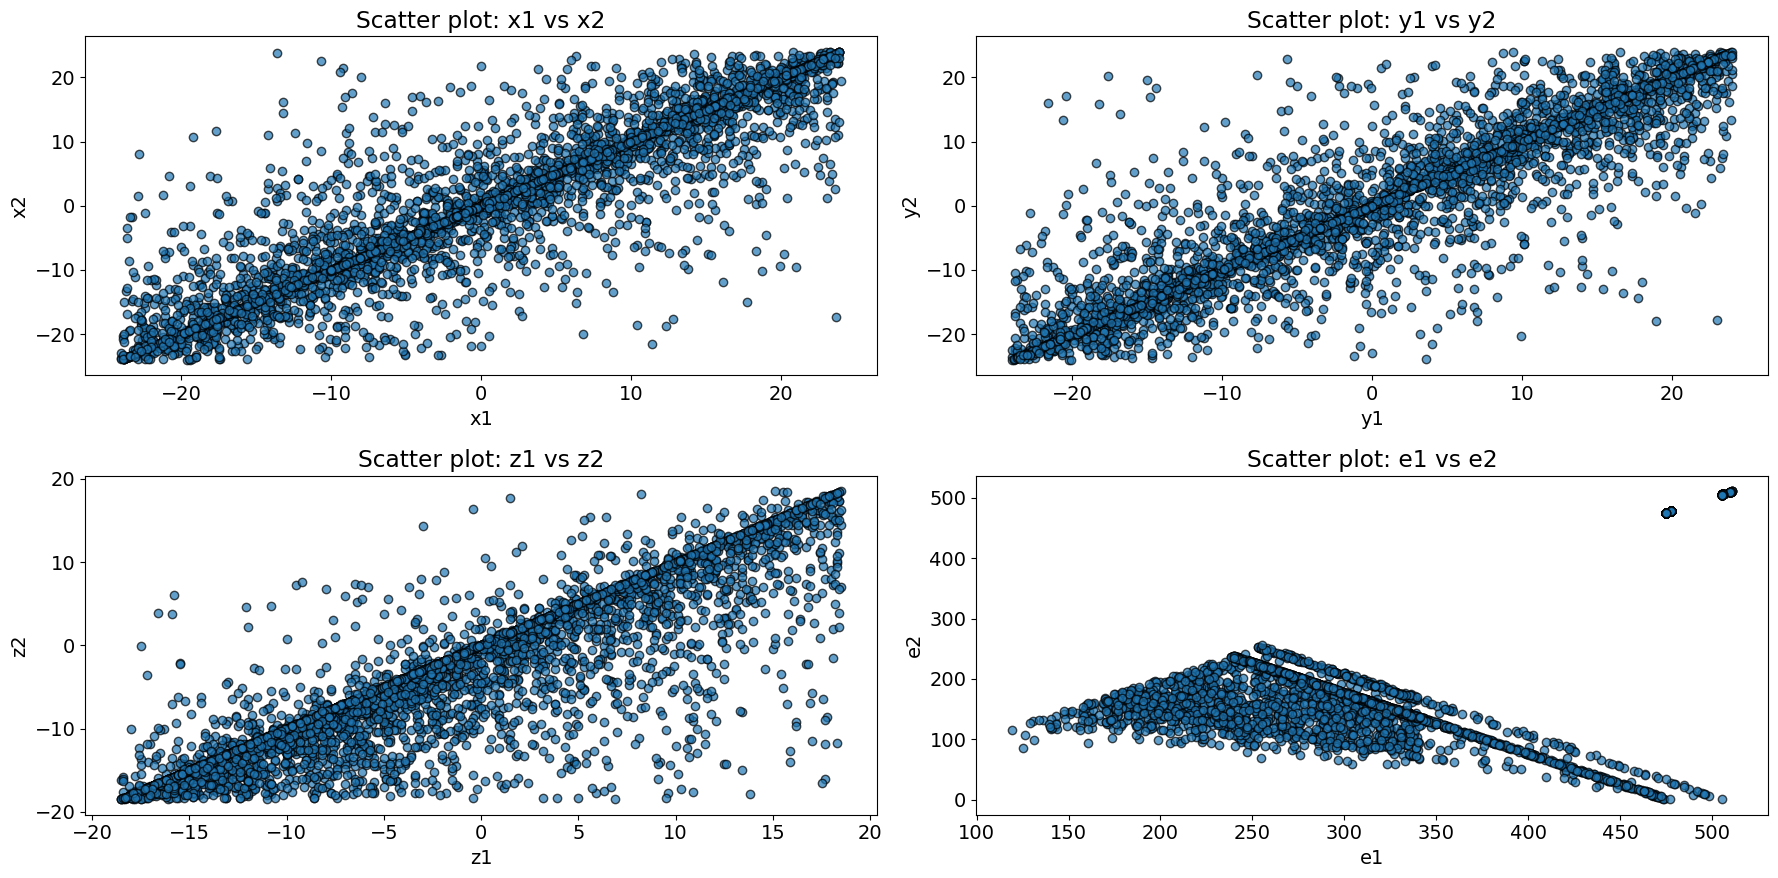

In [41]:
scatter_xyze(df2c)